# $\Psi$ Therapies

For questions, email jwu202 at student dot monash dot edu.

## What is this?

This notebook generates the data and graphics for a psychotherapy revision lecture.

## How does it work?

The presentation is a slide deck. Each slide in the deck states a concrete, actionable suggestion for clinical practice related to psychotherapy within the confines of medical student learning. Please note that this is for educational purposes only, and does not constitute medical advice. If you need further discouragement, then please also note it was written by a medical student.

Each slide contains four pieces of data:

1. A situation.
2. A suggestion.
3. The rationale.
4. A concrete example.

This slide deck is aimed at clinical students, so basic preclinical knowledge (e.g. pharmacology, neurotransmitters) is assumed. 

This notebook generates the slides (mostly just the graphics). The notebook mixes text descriptions with code blocks (in grey). The code is written in the [Julia](https://julialang.org/) programming language.

# Setup

Graphics are made using [Luxor.jl](https://github.com/JuliaGraphics/Luxor.jl).

In [1]:
# using Pkg
# Pkg.add("JSON")
# Pkg.add("Luxor")
using Luxor
using JSON
using DataStructures

Below, we define a convenience macro to ensure all images are a consistent shape and size.

In [2]:
macro img(filename, expr)
    quote
        @svg begin
            $(esc(expr))
            end 480 480 $("./graphics/$filename.svg")
    end
end

@img (macro with 1 method)

In [3]:
X, Y = 480, 480

(480, 480)

We first define an empty list of slides.

In [4]:
slides = []

0-element Array{Any,1}

We then define a convenience macro for making slides that will push a slide into the `slides` list and save the graphic information.

In [5]:
macro slide(name, scenario, suggestion, rationale, example_stem, example_answer, graphic_name, graphic)
    quote
        push!($(esc(slides)), Dict("scenario" => $(scenario),
            "suggestion" => $(suggestion),
            "rationale" => $(rationale),
            "example_stem" => $(example_stem),
            "example_answer" => $(example_answer),
            "graphic_name" => $(graphic_name),
            ))
        @img $(graphic_name) begin
            $(esc(graphic))
            end 
    end
end

@slide (macro with 1 method)

# Psychopharmacology

## A Quick Overview

Drugs used in psychiatry almost always target neurotransmitters in the brain. Here's a quick review of some of the neurotransmitters we'll come across.

My main reference for this presentation is [Kaplan and Saddock, which everyone at Monash has online access to through the library.](https://monash.hosted.exlibrisgroup.com/primo-explore/fulldisplay?docid=catau51316803080001751&context=L&vid=MONUI&search_scope=au_everything&isFrbr=true&tab=default_tab&lang=en_US)

### Serotonin (aka 5-HT, aka 5-hydroxytryptamine).

- Comes from *raphe nuclei* ('seam') near medial aspect of brainstem.
- Raphe nuclei has a  median and dorsal part.
- Behavioural (e.g. sleep cycle, mood, arousal).

### Noradrenaline (aka norepinephrine).

- Comes from *locus coeruleus* in the pons.
- Goes everywhere (almost). 
- Stress response
- α and β receptors.


### Dopamine

| Pathway | Nigrostriatal | Mesolimbic | Mesocortical | Tuberoinfundibular | 
|------------|---------|-----|---|------|
| Source     | Substantia nigra | VTA | VTA | Arcuate nucleus | 
| Target     | Dorsal striatum | Ventral striatum | Cortex | Pituitary stalk ("infundibulum") |
| Association | Movement | Motivation/addiction | Cognition | *Inhibits* lactation | 

- Five receptors (D1 - D5) 
- Atypicals block D2 without much impact on D1. 
- Match effects with pathways:
    - Nigrostriatal -> extrapyramidal symptoms
    - Tuberoinfundibular -> galactorrhoea -> menstrual dysfunction, sexual dysfunction, reduced bone density. (especially D2-avid, e.g. risperidone)

### Acetylcholine


Groupings:

1. The monoamines = Serotonin, Dopamine, Noradrenaline.
2. The catecholamines = Dopamine, Noradrenaline, (Adrenaline). 
    - Come from a common pathway (tyrosine -> dopa -> dopamine -> noradrenaline -> adrenaline). 

In [6]:
function brain()
    
    gsave()
    
    sethue(0.8, 0.7, 0.8)
    ellipse(Point(0,0), 120, 100, :fillstroke)
    circle(0, 25, 35, :fillstroke)
    ellipse(0, 65, 30, 50, :fillstroke)
    box(0, 60, 20, 100, :fillstroke)
    
#     sethue(1,1,1)
#     fontsize(16)
#     fontface("Helvetica-Bold")
#     text("BRAIN", 0, 0, halign=:center)
    
    grestore()
    
end

brain (generic function with 1 method)

In [7]:
function title(string)
    gsave()
    fontface("Helvetica-Bold")
    fontsize(20)
    sethue(0,0,0)
    text(string, 0, 200, halign=:center)
    grestore()
end

title (generic function with 1 method)

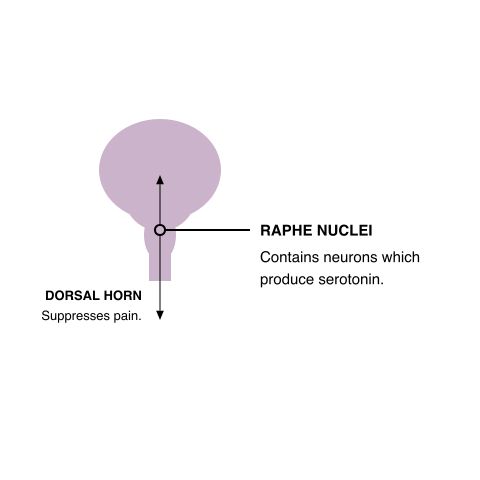

In [38]:
@img "serotonin-source" begin
    
    translate(-30,-70)
    
    gsave()
    translate(-50, 0)
    brain()
    grestore()
    
    r_pin = 5
    
    circle(-50,60, r_pin,:stroke)
    line(Point(-50+r_pin,60), Point(40,60), :stroke)
    arrow(Point(-50, 60+r_pin), Point(-50, 150))
    arrow(Point(-50, 60-r_pin), Point(-50, 5))
    
    fontface("Helvetica-Bold")
    fontsize(15)
    text("RAPHE NUCLEI", 50, 60, valign=:middle)
    fontface("Helvetica")
    textwrap("Contains neurons which produce serotonin.", 200, Point(50,70))
    
    fontsize(13)
    fontface("Helvetica-Bold")
    text("DORSAL HORN", -70, 130, halign=:right)
    fontface("Helvetica")
    text("Suppresses pain.", -70, 150, halign=:right)
    
    #title("SEROTONIN")
    
end

In [10]:
function brainside()
    
    gsave()
    
    sethue(0.8, 0.7, 0.8)
    ellipse(Point(0,0), 160, 100, :fillstroke)
    circle(40, 15, 50, :fillstroke)
    circle(30, 55, 30, :fillstroke)
    circle(-7.5, 50, 5, :fillstroke)
    ellipse(10, 65, 30, 50, :fillstroke)
    box(20, 60, 20, 100, :fillstroke)
    
#     sethue(1,1,1)
#     fontsize(16)
#     fontface("Helvetica-Bold")
#     text("BRAIN", 0, 0, halign=:center)
    
    grestore()
    
end
    

brainside (generic function with 1 method)

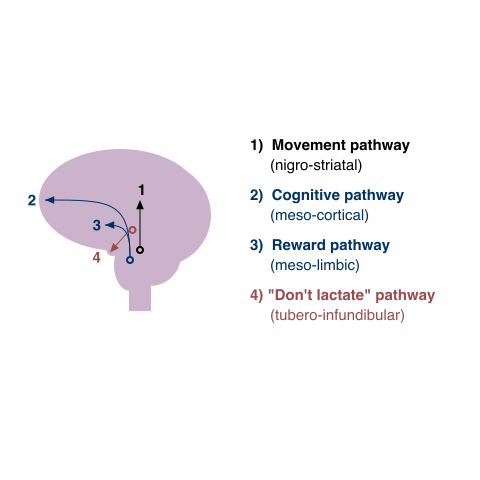

In [42]:
@img "dopamine-source" begin
    
    translate(-70,-40)
    
    gsave()
    translate(-50, 0)
    brainside()
    grestore()
    
    r_pin = 3
    fontface("Helvetica-Bold")
    fontsize(15)
    
    sethue(0.6, 0.3, 0.3)
    hx, hy = -37.5, 30
    circle(hx, hy, r_pin, :stroke)
    arrow(Point(hx-r_pin, hy), Point(hx-22.5, hy+22.5))   
    text("4", Point(hx-22.5-10, hy+22.5+10), halign=:right)
    text("4) \"Don't lactate\" pathway", 80, 100)
    fontface("Helvetica")
    text("(tubero-infundibular)", 100, 120)
    
    sethue(0,0,0)
    snx, sny = -30, 50
    circle(snx, sny,r_pin,:stroke)
    arrow(Point(snx, sny-r_pin), Point(snx, sny-50))
    fontface("Helvetica-Bold")
    text("1", Point(snx, sny-55), valign=:bottom, halign=:center)
    text("1)  Movement pathway", 80, -50)
    fontface("Helvetica")
    text("(nigro-striatal)", 100, -30)
    
    sethue(0, 0.2, 0.4)
    vtax, vtay = -40, 60
    circle(vtax, vtay, r_pin, :stroke)
    
    arrow(Point(vtax, vtay-r_pin), Point(vtax, vtay-30), Point(vtax-5, vtay-35), Point(vtax-25, vtay-35))
    fontface("Helvetica-Bold")
    text("3", Point(vtax-30, vtay-35), halign=:right, valign=:middle)
    text("3)  Reward pathway", 80, 50)
    fontface("Helvetica")
    text("(meso-limbic)", 100, 70)
    
    arrow(Point(vtax, vtay-r_pin), Point(vtax, vtay-60), Point(vtax-20, 0), Point(-125, 0))
    fontface("Helvetica-Bold")
    text("2", Point(-135,0), halign=:right, valign=:middle)
    text("2)  Cognitive pathway", 80, 0)
    fontface("Helvetica")
    text("(meso-cortical)", 100, 20)
    
    #title("DOPAMINE")
    
end

In [12]:
function label(main, subtext, xmin, ymin)
    gsave()
    
    sethue(0,0,0)
    fontsize(15)
    fontface("Helvetica-Bold")
    text(main, xmin, ymin, valign=:middle)
    
    fontface("Helvetica")
    textwrap(subtext, 200, Point(xmin, ymin+10))
    
    grestore()
end

label (generic function with 1 method)

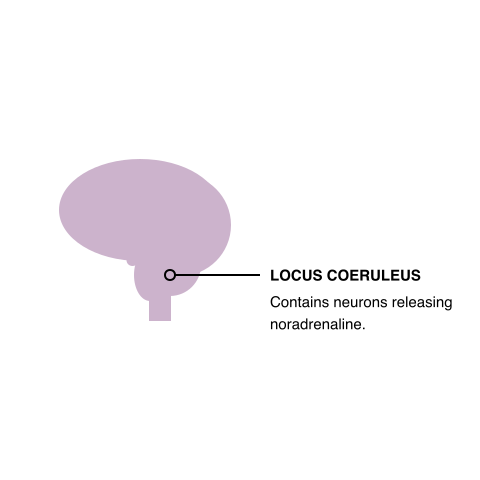

In [43]:
@img "noradrenaline-source" begin

    
    translate(-100,-30)
    brainside()    
    r_pin = 5
    circle(30, 65, r_pin, :stroke)
    line(Point(30+r_pin,65), Point(120, 65), :stroke)
    
    label("LOCUS COERULEUS", "Contains neurons releasing noradrenaline.", 130, 65)

end

# Outline

In [14]:
function treesplit(root :: String, labels :: OrderedDict{String, String};
                    xscale :: Float64 = 1, yscale :: Float64 = 1)

    gsave()
    fontsize(11)
    numlabels = length(labels)
    yspacing = 30 * yscale
    xdist = 120 * xscale
    r_pin = 1
    
    for (i, entry) in enumerate(labels)
        ypos = (i - 0.5 - numlabels / 2) * yspacing
        setcolor(entry[2])
        move(O)
        curve(O + (xdist/2, 0), O + (xdist/2,ypos), O + (xdist, ypos))
        strokepath()
        circle(O + (xdist, ypos), r_pin, :fillstroke)
        text(entry[1], Point(xdist + 10, ypos), valign=:middle)
    end
    
    sethue(0,0,0)
    fontface("Helvetica-Bold")
    text(root, -5, 0, valign=:middle, halign=:right)
    grestore()
    
end

treesplit (generic function with 1 method)

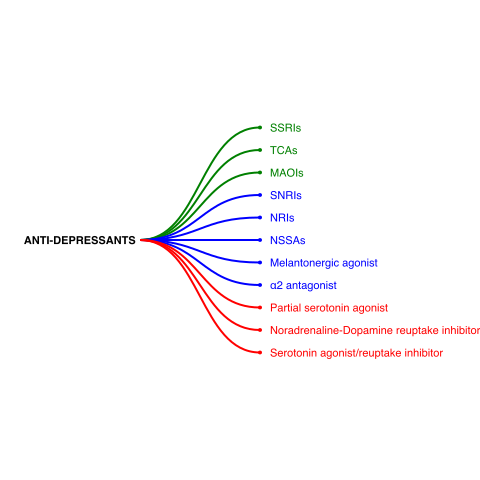

In [15]:
@img "antidepressants" begin
    labels = OrderedDict(
        "SSRIs" => "green",
        "TCAs" => "green",
        "MAOIs" => "green",
        "SNRIs" => "blue",
        "NRIs" => "blue",
        "NSSAs" => "blue",
        "Melantonergic agonist" => "blue",
        "α2 antagonist" => "blue",
        "Partial serotonin agonist" => "red",
        "Noradrenaline-Dopamine reuptake inhibitors" => "red",
        "Serotonin agonist/reuptake inhibitor" => "red",
    )
    translate(-100,0)
    treesplit("ANTI-DEPRESSANTS", labels, xscale=1.0, yscale=0.75)
end

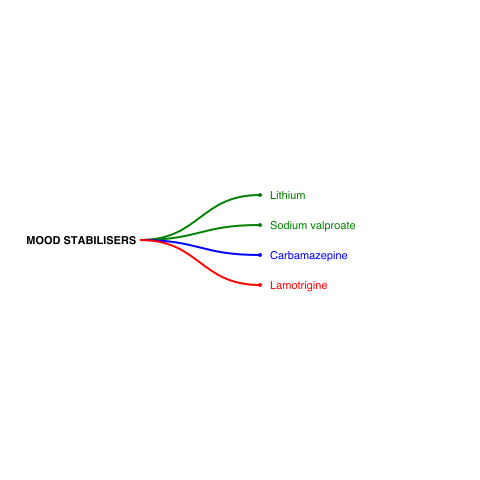

In [16]:
@img "mood-stabilisers" begin
    labels = OrderedDict(
        "Lithium" => "green",
        "Sodium valproate" => "green",
        "Carbamazepine" => "blue",
        "Lamotrigine" => "red",
    )
    translate(-100,0)
    treesplit("MOOD STABILISERS", labels, xscale=1.0, yscale=1.0)
end

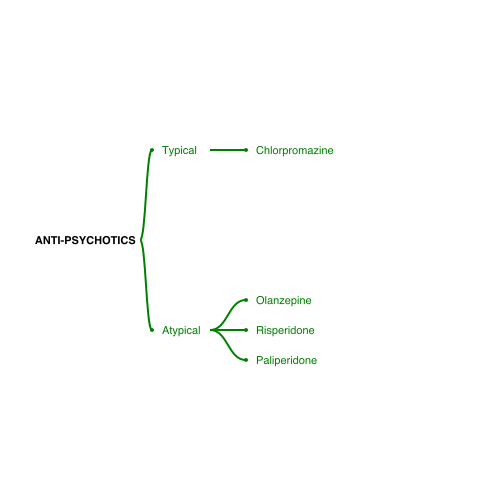

In [17]:
@img "anti-psychotics" begin
    labels1 = OrderedDict(
        "Typical" => "green",
        "Atypical" => "green",
    )
    
    yscale = 6.0
    
    translate(-100,0)
    treesplit("ANTI-PSYCHOTICS", labels1, xscale=0.1, yscale=yscale)
    

    translate(70,-15 * yscale)
    labels_typical = OrderedDict(
        "Chlorpromazine" => "green",
    )
    treesplit("", labels_typical, xscale=0.3, yscale=1.0)
    
    translate(0,30 * yscale)
    labels_atypical = OrderedDict(
        "Olanzepine" => "green",
        "Risperidone" => "green",
        "Paliperidone" => "green",
    )
    treesplit("", labels_atypical, xscale=0.3, yscale=1.0)
    
    
end

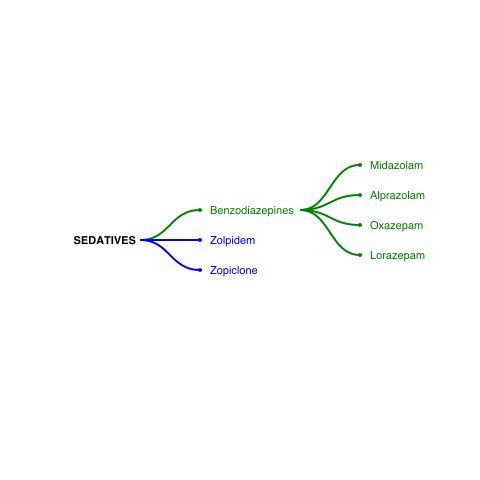

In [18]:
@img "sedatives" begin
    translate(-100, 0)
    labels = OrderedDict(
        "Benzodiazepines" => "green",
        "Zolpidem" => "blue",
        "Zopiclone" => "blue",
    )
    
    treesplit("SEDATIVES", labels, xscale=0.5, yscale=1.0)
    
    
    translate(160, -30)
    labels_benzos = OrderedDict(
        "Midazolam" => "green",
        "Alprazolam" => "green",
        "Oxazepam" => "green",
        "Lorazepam" => "green",
    )
    
    treesplit("", labels_benzos, xscale=0.5, yscale=1.0)
end

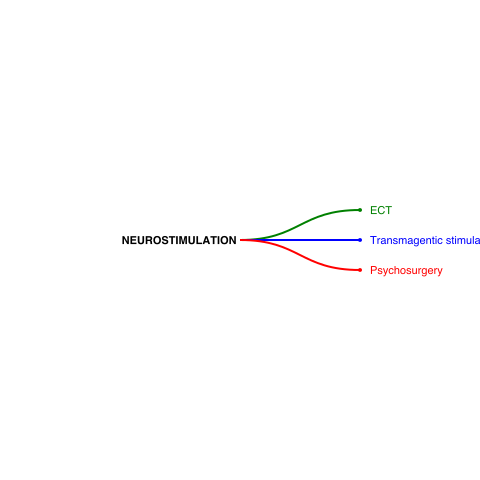

In [19]:
@img "neurostimulation" begin
    labels = OrderedDict(
        "ECT" => "green",
        "Transmagentic stimulation" => "blue",
        "Psychosurgery" => "red"
    )
    
    treesplit("NEUROSTIMULATION", labels, xscale=1.0, yscale=1.0)
end

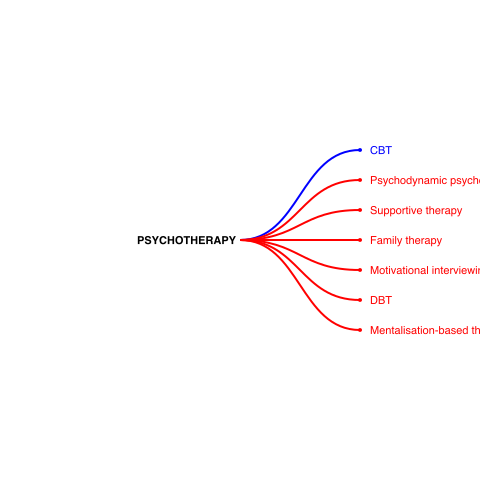

In [20]:
@img "psychotherapy" begin
    labels = OrderedDict(
        "CBT" => "blue", 
        "Psychodynamic psychotherapy" => "red",
        "Supportive therapy" => "red",
        "Family therapy" => "red",
        "Motivational interviewing" => "red",
        "DBT" => "red",
        "Mentalisation-based therapy" => "red"
    )
    
    treesplit("PSYCHOTHERAPY", labels, xscale=1.0, yscale=1.0)
end

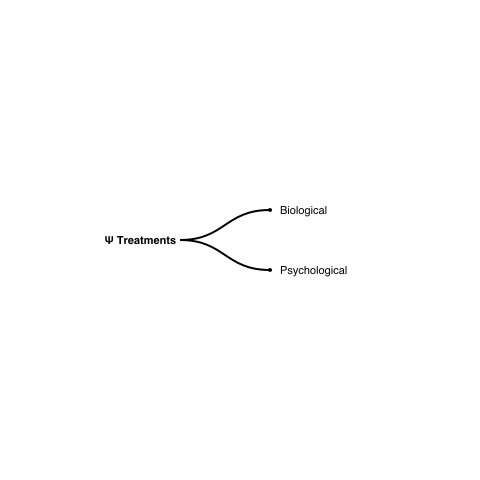

In [28]:
@img "contents" begin
    
    translate(-60,0)
    
    labels = OrderedDict(
        "Biological" => "black",
        "Psychological" => "black",
    )
    
    treesplit("Ψ Treatments", labels, xscale=0.75, yscale=2.0)
    

end

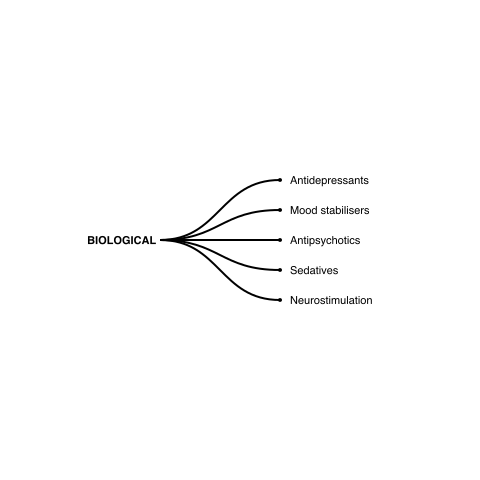

In [32]:
@img "biological" begin
    
    translate(-80,0)
    
    labels_bio = OrderedDict(
        "Antidepressants" => "black",
        "Mood stabilisers" => "black",
        "Antipsychotics" => "black",
        "Sedatives" => "black",
        "Neurostimulation" => "black",
    )
    
    treesplit("BIOLOGICAL", labels_bio, xscale=1.0, yscale=1.0)
end

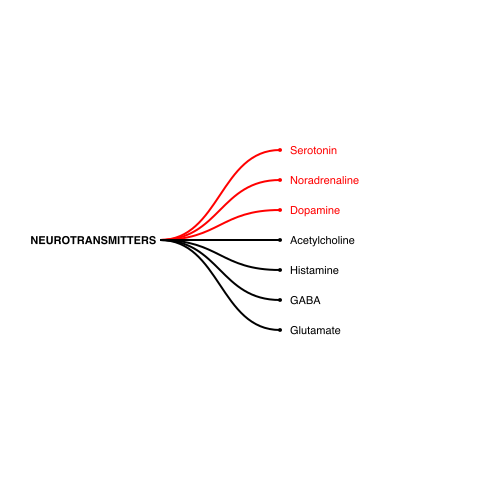

In [37]:
@img "transmitters" begin
    
    translate(-80,0)
    
    labels = OrderedDict(
        "Serotonin " => "red",
        "Noradrenaline" => "red",
        "Dopamine" => "red",
        "Acetylcholine" => "black", 
        "Histamine" => "black",
        "GABA" => "black",
        "Glutamate" => "black",
    )
    
    treesplit("NEUROTRANSMITTERS", labels, xscale=1.0, yscale=1.0)
    
end

# Antidepressants

In [48]:
apropos("ordered dict")

OrderedCollections.LittleDict


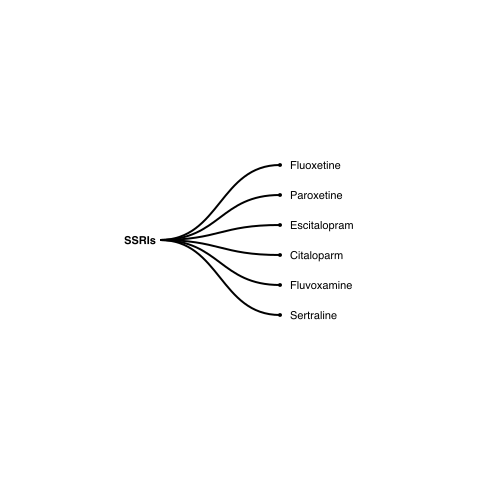

In [49]:
@img "ssri" begin
    translate(-80, 0)
    
    list = ["Fluoxetine", "Paroxetine", "Escitalopram", "Citalopram", "Fluvoxamine", "Sertraline" ]
    
    labels = OrderedDict(
        "Fluoxetine" => "black",
        "Paroxetine" => "black",
        "Escitalopram" => "black", 
        "Citaloparm" => "black",
        "Fluvoxamine" => "black",
        "Sertraline" => "black",
    )
    
    treesplit("SSRIs", labels, xscale=1.0, yscale=1.0)
    
end


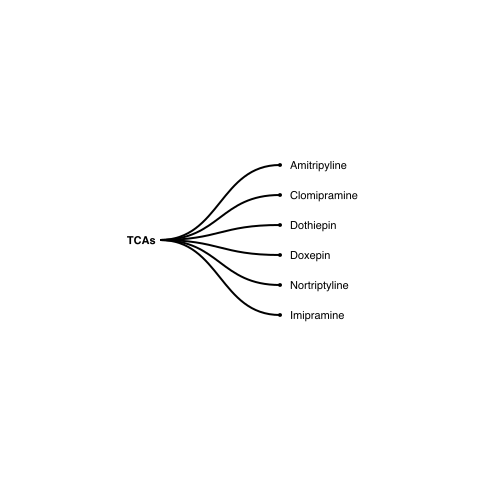

In [52]:
@img "tca" begin
    
    translate(-80, 0)
    
    labels = OrderedDict(
        "Amitripyline" => "black",
        "Clomipramine" => "black",
        "Dothiepin" => "black",
        "Doxepin" => "black",
        "Nortriptyline" => "black",
        "Imipramine" => "black",
    )
    
    treesplit("TCAs", labels, xscale=1.0, yscale=1.0)
end